### Questão 1

In [4]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def load_reviews(data_path):
    reviews = []
    labels = []
    
    for label in ['pos', 'neg']:
        folder_path = os.path.join(data_path, 'train', label)
        for filename in os.listdir(folder_path):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                reviews.append(file.read())
                labels.append(1 if label == 'pos' else 0)
    
    return reviews, labels

data_path = './aclImdb_v1/aclImdb'

reviews, labels = load_reviews(data_path)

X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Aplicar TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Tamanho da matriz de treino: {X_train_tfidf.shape}")
print(f"Tamanho da matriz de teste: {X_test_tfidf.shape}")

Tamanho da matriz de treino: (20000, 24469)
Tamanho da matriz de teste: (5000, 24469)


### Questão 2


In [6]:
import numpy as np

X_train_tfidf = tfidf_vectorizer.transform(X_train)

max_tfidf = X_train_tfidf.max(axis=0).toarray().ravel()

sorted_by_tfidf = max_tfidf.argsort()

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

print("Features com menor TF-IDF:")
print(feature_names[sorted_by_tfidf[:10]])

print("\nFeatures com maior TF-IDF:")
print(feature_names[sorted_by_tfidf[-10:][::-1]])


Features com menor TF-IDF:
['tantamount' 'reversing' 'negotiate' 'attained' 'confidante'
 'songwriting' 'bastille' 'baptism' 'sylvain' 'piecing']

Features com maior TF-IDF:
['pokemon' 'smallville' 'steve' 'wei' 'dev' 'casper' 'botched' 'weller'
 'sasquatch' 'woo']


### Questão 3

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(max_iter=1000)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(log_reg, param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)

best_model = grid.best_estimator_

test_accuracy = best_model.score(X_test_tfidf, y_test)
print("Melhor parâmetro C:", grid.best_params_)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")


Melhor parâmetro C: {'C': 10}
Acurácia no conjunto de teste: 0.8920


### Questão 4

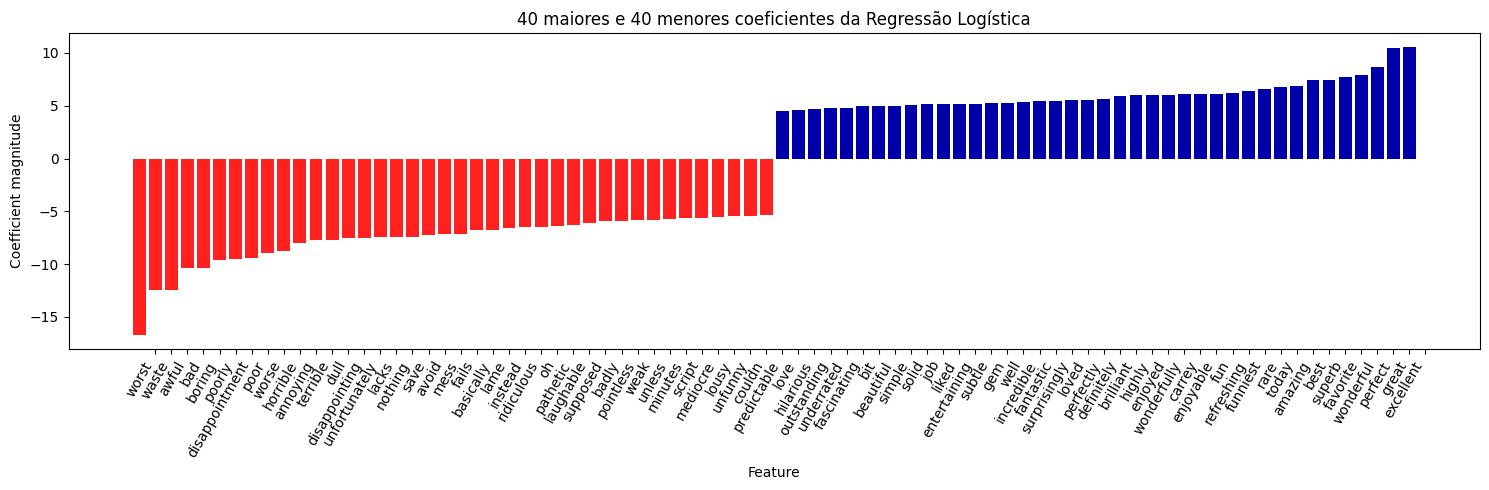

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

coef = best_model.coef_.flatten()

mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.title("40 maiores e 40 menores coeficientes da Regressão Logística")
plt.tight_layout()
plt.show()
